In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from scipy.stats import pearsonr

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

652

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#print(query_url)

lat = []
long = []
temp = []
humidity = []
foundcities = []
cloud = []
wind = []
tempmax = []
country = []
datetime = []

#for city in cities[:25]:
for i in range(len(cities)):
    
    #print(query_url+city)
    response = requests.get(query_url + cities[i]).json()
    
    try:
        response['coord']
    except:
        print(f'{i} {cities[i]} not found. Continuing.')
        continue
        
    #print(type(response))
    #print(json.dumps(response, indent=4))
    
    lat.append(response['coord']['lat'])
    long.append(response['coord']['lon'])
    temp.append(response['main']['temp'])
    humidity.append(response['main']['humidity'])
    foundcities.append(response['name'])
    cloud.append(response['clouds']['all'])
    wind.append(response['wind']['speed'])
    tempmax.append(response['main']['temp_max'])
    country.append(response['sys']['country'])
    datetime.append(response['dt'])
    
    print(i, cities[i])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

        
#     except:
#         continue

0 saskylakh
1 murud
2 albany
3 sibu
4 fairbanks
5 najran
6 ushuaia
7 punta arenas
8 sisimiut
9 bredasdorp
10 osakarovka
11 butaritari
12 sinnamary
13 cherskiy
14 qandala
15 bluff
16 vila franca do campo
17 autun
18 cabo san lucas
19 vokhma
20 saint-philippe
21 pambujan
22 illoqqortoormiut not found. Continuing.
23 bo phloi
24 khatanga
25 jamestown
26 victoria
27 port-gentil
28 puerto ayora
29 hasaki
30 airai
31 anjozorobe
32 mataura
33 talnakh
34 hamilton
35 pisco
36 tuktoyaktuk
37 batagay-alyta
38 kavaratti
39 burnie
40 xacmaz
41 pleshanovo
42 wuda
43 taolanaro not found. Continuing.
44 corinto
45 cape town
46 emet
47 bardiyah
48 stepnogorsk
49 naifaru
50 saint-augustin
51 geraldton
52 dikson
53 walvis bay
54 villarrobledo
55 amderma not found. Continuing.
56 aguimes
57 torbay
58 busselton
59 saleaula not found. Continuing.
60 ahipara
61 tacoronte
62 rikitea
63 castro
64 esmeraldas
65 vilnius
66 chala
67 tutoia
68 faanui
69 atuona
70 barentsburg not found. Continuing.
71 kununurra
72 

547 canakkale
548 da nang
549 daru
550 tumannyy not found. Continuing.
551 udomlya
552 bagaces
553 kenai
554 bonnyville
555 haibowan not found. Continuing.
556 gazli
557 kadoma
558 khatassy
559 berlevag
560 hanover
561 smolenka
562 paris
563 tawkar not found. Continuing.
564 seydi
565 santa maria
566 baghdad
567 mansa
568 vardo
569 sorvag not found. Continuing.
570 alugan
571 thai binh
572 suwannaphum
573 rio verde de mato grosso
574 lawton
575 westport
576 mionica
577 necochea
578 omsukchan
579 jiazi
580 savelugu
581 rivera
582 valente
583 teguldet
584 phan thiet
585 bathurst
586 wolbrom
587 pacific grove
588 ballina
589 kartaly
590 lira
591 alekseyevsk
592 fraga
593 la palma
594 aybak not found. Continuing.
595 santa cruz cabralia
596 khormuj not found. Continuing.
597 srivardhan
598 sosua
599 cabra
600 port-cartier
601 prado
602 chara
603 kampot
604 cayenne
605 puerto escondido
606 louisbourg not found. Continuing.
607 grand centre not found. Continuing.
608 havoysund
609 mola di ba

In [4]:

#make the dataframe using a dictionary
# create a data frame from cities, lat, long, temp, and humidity
weather_dict = {
    "city": foundcities,
    "lat": lat,
    "long": long,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloud,
    "windspeed": wind,
    "max temp": tempmax,
    "country": country,
    "datetime": datetime
}
weather_data = pd.DataFrame(weather_dict)
weather_data
# print(len(foundcities))
# print(len(lat))
# print(len(long))
# print(len(temp))
# print(len(humidity))

,city,lat,long,temp,humidity,cloudiness,windspeed,max temp,country,datetime
0,Saskylakh,71.92,114.08,-9.63,94,100,9.87,-9.63,RU,1603572140
1,Murud,18.33,72.97,25.32,87,43,2.00,25.32,IN,1603572140
2,Albany,42.60,-73.97,11.72,68,45,4.47,13.33,US,1603572004
3,Sibu,2.30,111.82,23.93,94,40,1.00,24.00,MY,1603571887
4,Fairbanks,64.84,-147.72,-4.37,92,90,1.27,-2.22,US,1603571949
...,...,...,...,...,...,...,...,...,...,...
595,Tayginka,55.62,60.51,5.28,91,100,3.28,5.28,RU,1603572284
596,Youkounkoun,12.53,-13.13,27.44,51,5,0.06,27.44,GN,1603572284
597,Cañon City,38.44,-105.24,23.35,9,1,11.80,27.00,US,1603572284
598,Bara,10.37,10.73,26.34,33,90,2.23,26.34,NG,1603572284


In [5]:
#export to csv
#.to_csv('filepath/name')
weather_data.to_csv('output_data/weather_data.csv')

In [6]:
#open the dataframe from the saved CSV to use consistent data
opened_df = pd.read_csv('output_data/weather_data.csv', index_col ='Unnamed: 0')
opened_df

,city,lat,long,temp,humidity,cloudiness,windspeed,max temp,country,datetime
0,Saskylakh,71.92,114.08,-9.63,94,100,9.87,-9.63,RU,1603572140
1,Murud,18.33,72.97,25.32,87,43,2.00,25.32,IN,1603572140
2,Albany,42.60,-73.97,11.72,68,45,4.47,13.33,US,1603572004
3,Sibu,2.30,111.82,23.93,94,40,1.00,24.00,MY,1603571887
4,Fairbanks,64.84,-147.72,-4.37,92,90,1.27,-2.22,US,1603571949
...,...,...,...,...,...,...,...,...,...,...
595,Tayginka,55.62,60.51,5.28,91,100,3.28,5.28,RU,1603572284
596,Youkounkoun,12.53,-13.13,27.44,51,5,0.06,27.44,GN,1603572284
597,Cañon City,38.44,-105.24,23.35,9,1,11.80,27.00,US,1603572284
598,Bara,10.37,10.73,26.34,33,90,2.23,26.34,NG,1603572284


In [7]:
#  Get the indices of cities that have humidity over 100%.
#create empty list
index_list = []

#create for loop to add hum=100 indices to the list
for i in range(len(opened_df)):
    if humidity[i] > 100:
        index_list.append(i)
        #print(f'This is {i}')
    
print(f'Here is a list of indices where humidity is > 100: {index_list}')    
#len(opened_df)

Here is a list of indices where humidity is > 100: []


# Lat vs Temp

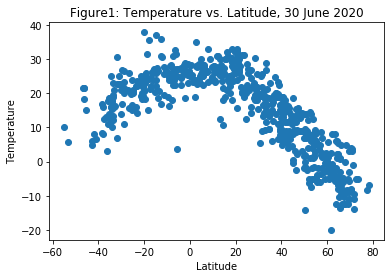

In [12]:
# set x and y values
x_values = opened_df['lat']
y_values = opened_df['temp']

# create scatter plot
plt.scatter(x_values, y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Temperature')

plt.title(label="Figure1: Temperature vs. Latitude, 30 June 2020")

#Save as png
plt.savefig('Images/LatvTemp.png')

# Show plot
plt.show()

# Lat vs Humidity

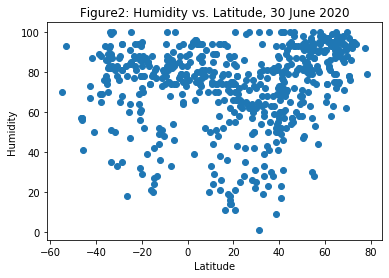

In [11]:
# set x and y values
x_values = opened_df['lat']
y_values = opened_df['humidity']

# create scatter plot
plt.scatter(x_values, y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.title(label="Figure2: Humidity vs. Latitude, 30 June 2020")

#Save as png
plt.savefig('Images/LatvHumidity.png')

# Show plot
plt.show()

# Latitude vs Cloudiness

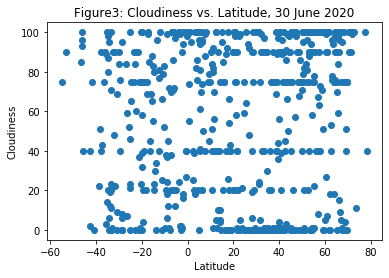

In [13]:
# set x and y values
x_values = opened_df['lat']
y_values = opened_df['cloudiness']

# create scatter plot
plt.scatter(x_values, y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.title(label="Figure3: Cloudiness vs. Latitude, 30 June 2020")

#Save as png
plt.savefig('Images/LatvCloud.png')

# Show plot
plt.show()

# Latitude vs Windspeed

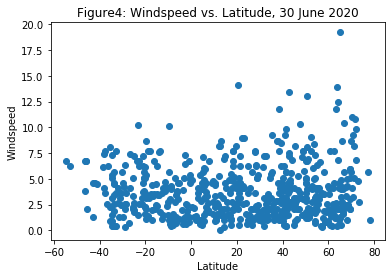

In [14]:
# set x and y values
x_values = opened_df['lat']
y_values = opened_df['windspeed']

# create scatter plot
plt.scatter(x_values, y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Windspeed')

plt.title(label="Figure4: Windspeed vs. Latitude, 30 June 2020")

#Save as png
plt.savefig('Images/LatvWind.png')

# Show plot
plt.show()

# Linear Regressions

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = opened_df[(opened_df['lat'] > 0)]
northern_df

,city,lat,long,temp,humidity,cloudiness,windspeed,max temp,country,datetime
0,Saskylakh,71.92,114.08,-9.63,94,100,9.87,-9.63,RU,1603572140
1,Murud,18.33,72.97,25.32,87,43,2.00,25.32,IN,1603572140
2,Albany,42.60,-73.97,11.72,68,45,4.47,13.33,US,1603572004
3,Sibu,2.30,111.82,23.93,94,40,1.00,24.00,MY,1603571887
4,Fairbanks,64.84,-147.72,-4.37,92,90,1.27,-2.22,US,1603571949
...,...,...,...,...,...,...,...,...,...,...
595,Tayginka,55.62,60.51,5.28,91,100,3.28,5.28,RU,1603572284
596,Youkounkoun,12.53,-13.13,27.44,51,5,0.06,27.44,GN,1603572284
597,Cañon City,38.44,-105.24,23.35,9,1,11.80,27.00,US,1603572284
598,Bara,10.37,10.73,26.34,33,90,2.23,26.34,NG,1603572284


In [16]:
southern_df = opened_df[(opened_df['lat'] <= 0)]
southern_df

,city,lat,long,temp,humidity,cloudiness,windspeed,max temp,country,datetime
6,Ushuaia,-54.80,-68.30,10.00,70,75,6.70,10.00,AR,1603572082
7,Punta Arenas,-53.15,-70.92,5.77,93,90,6.20,6.00,CL,1603572141
9,Bredasdorp,-34.53,20.04,16.00,87,0,1.50,16.00,ZA,1603572142
15,Bluff,-46.60,168.33,21.67,57,85,6.71,21.67,NZ,1603572143
20,Saint-Philippe,-21.36,55.77,19.30,64,0,2.60,22.00,RE,1603572144
...,...,...,...,...,...,...,...,...,...,...
576,Brits,-25.63,27.78,19.66,60,52,2.10,20.00,ZA,1603572280
584,Dondo,-19.61,34.74,22.89,88,20,3.10,23.00,MZ,1603572281
588,Ancud,-41.87,-73.82,7.95,87,75,4.60,11.11,CL,1603572282
589,Witu,-2.39,40.44,26.00,83,1,2.60,26.00,KE,1603572282


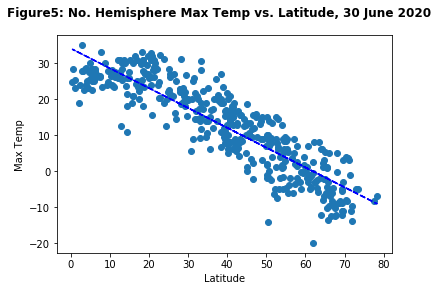

y = -0.55 * x + 34.14
Pearsons correlation coefficient: -0.888


In [18]:
# find the fit line: y = mx + b
x_axis = northern_df['lat']
y_values = northern_df['max temp']
(slope, intercept, _, _, _) = linregress(x_axis, y_values)
fit = slope * x_axis + intercept

# graph the line and the scatter plot together using subplot()
fig, ax = plt.subplots()
fig.suptitle("Figure5: No. Hemisphere Max Temp vs. Latitude, 30 June 2020", fontsize=12, fontweight="bold")

# ax.set_xlim(min(capomulin_avg_df["Weight (g)"])-1, max(capomulin_avg_df["Weight (g)"])+1)
# ax.set_ylim(min(capomulin_avg_df["Tumor Volume (mm3)"])-1, max(capomulin_avg_df["Tumor Volume (mm3)"])+1)

ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temp")

ax.plot(x_axis, y_values, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Save as png
plt.savefig('Images/MaxtempvLat.png')

plt.show()
print(f'y = {round(slope,2)} * x + {round(intercept,2)}')
corr, _ = pearsonr(x_axis, y_values)
print('Pearsons correlation coefficient: %.3f' % corr)

## southern hemisphere max temp vs latitue reggression

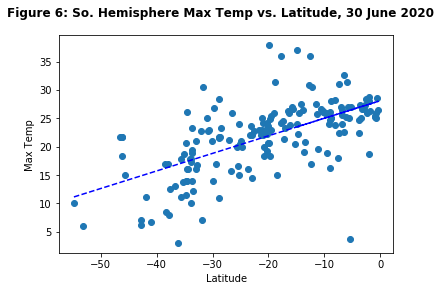

y = 0.31 * x + 28.09
Pearsons correlation coefficient: 0.619


In [19]:
# find the fit line: y = mx + b
x_axis = southern_df['lat']
y_values = southern_df['max temp']
(slope, intercept, _, _, _) = linregress(x_axis, y_values)
fit = slope * x_axis + intercept

# graph the line and the scatter plot together using subplot()
fig, ax = plt.subplots()

fig.suptitle("Figure 6: So. Hemisphere Max Temp vs. Latitude, 30 June 2020", fontsize=12, fontweight="bold")

# ax.set_xlim(min(capomulin_avg_df["Weight (g)"])-1, max(capomulin_avg_df["Weight (g)"])+1)
# ax.set_ylim(min(capomulin_avg_df["Tumor Volume (mm3)"])-1, max(capomulin_avg_df["Tumor Volume (mm3)"])+1)

ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temp")

ax.plot(x_axis, y_values, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Save as png
plt.savefig('Images/southmaxtempvlatregression.png')

plt.show()

print(f'y = {round(slope,2)} * x + {round(intercept,2)}')
corr, _ = pearsonr(x_axis, y_values)
print('Pearsons correlation coefficient: %.3f' % corr)

## Northern Hemisphere Humidity vs Latitute Regression

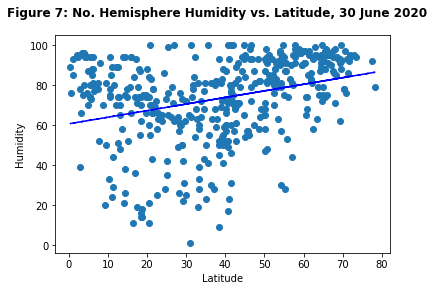

y = 0.33 * x + 60.63
Pearsons correlation coefficient: 0.313


In [20]:
# find the fit line: y = mx + b
x_axis = northern_df['lat']
y_values = northern_df['humidity']
(slope, intercept, _, _, _) = linregress(x_axis, y_values)
fit = slope * x_axis + intercept

# graph the line and the scatter plot together using subplot()
fig, ax = plt.subplots()

fig.suptitle("Figure 7: No. Hemisphere Humidity vs. Latitude, 30 June 2020", fontsize=12, fontweight="bold")

# ax.set_xlim(min(capomulin_avg_df["Weight (g)"])-1, max(capomulin_avg_df["Weight (g)"])+1)
# ax.set_ylim(min(capomulin_avg_df["Tumor Volume (mm3)"])-1, max(capomulin_avg_df["Tumor Volume (mm3)"])+1)

ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity")

ax.plot(x_axis, y_values, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Save as png
plt.savefig('Images/Norrthhemishperehumidtiyvlat.png')

plt.show()

print(f'y = {round(slope,2)} * x + {round(intercept,2)}')
corr, _ = pearsonr(x_axis, y_values)
print('Pearsons correlation coefficient: %.3f' % corr)

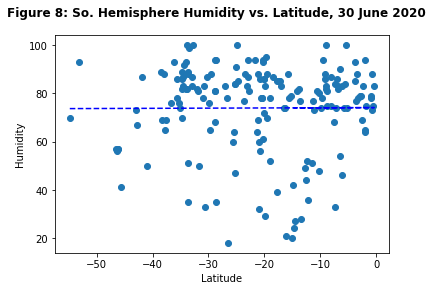

y = 0.01 * x + 74.13
Pearsons correlation coefficient: 0.005


In [21]:
# find the fit line: y = mx + b
x_axis = southern_df['lat']
y_values = southern_df['humidity']
(slope, intercept, _, _, _) = linregress(x_axis, y_values)
fit = slope * x_axis + intercept

# graph the line and the scatter plot together using subplot()
fig, ax = plt.subplots()

fig.suptitle("Figure 8: So. Hemisphere Humidity vs. Latitude, 30 June 2020", fontsize=12, fontweight="bold")

# ax.set_xlim(min(capomulin_avg_df["Weight (g)"])-1, max(capomulin_avg_df["Weight (g)"])+1)
# ax.set_ylim(min(capomulin_avg_df["Tumor Volume (mm3)"])-1, max(capomulin_avg_df["Tumor Volume (mm3)"])+1)

ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity")

ax.plot(x_axis, y_values, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Save as png
plt.savefig('Images/Figure8.png')

plt.show()

print(f'y = {round(slope,2)} * x + {round(intercept,2)}')
corr, _ = pearsonr(x_axis, y_values)
print('Pearsons correlation coefficient: %.3f' % corr)

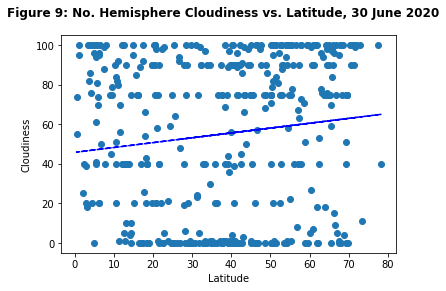

y = 0.25 * x + 45.8
Pearsons correlation coefficient: 0.126


In [22]:
# find the fit line: y = mx + b
x_axis = northern_df['lat']
y_values = northern_df['cloudiness']
(slope, intercept, _, _, _) = linregress(x_axis, y_values)
fit = slope * x_axis + intercept

# graph the line and the scatter plot together using subplot()
fig, ax = plt.subplots()

fig.suptitle("Figure 9: No. Hemisphere Cloudiness vs. Latitude, 30 June 2020", fontsize=12, fontweight="bold")

# ax.set_xlim(min(capomulin_avg_df["Weight (g)"])-1, max(capomulin_avg_df["Weight (g)"])+1)
# ax.set_ylim(min(capomulin_avg_df["Tumor Volume (mm3)"])-1, max(capomulin_avg_df["Tumor Volume (mm3)"])+1)

ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness")

ax.plot(x_axis, y_values, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Save as png
plt.savefig('Images/Figure9.png')

plt.show()

print(f'y = {round(slope,2)} * x + {round(intercept,2)}')
corr, _ = pearsonr(x_axis, y_values)
print('Pearsons correlation coefficient: %.3f' % corr)

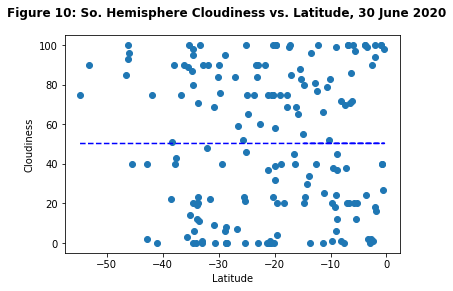

y = 0.0 * x + 50.35
Pearsons correlation coefficient: 0.000


In [23]:
# find the fit line: y = mx + b
x_axis = southern_df['lat']
y_values = southern_df['cloudiness']
(slope, intercept, _, _, _) = linregress(x_axis, y_values)
fit = slope * x_axis + intercept

# graph the line and the scatter plot together using subplot()
fig, ax = plt.subplots()

fig.suptitle("Figure 10: So. Hemisphere Cloudiness vs. Latitude, 30 June 2020", fontsize=12, fontweight="bold")

# ax.set_xlim(min(capomulin_avg_df["Weight (g)"])-1, max(capomulin_avg_df["Weight (g)"])+1)
# ax.set_ylim(min(capomulin_avg_df["Tumor Volume (mm3)"])-1, max(capomulin_avg_df["Tumor Volume (mm3)"])+1)

ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness")

ax.plot(x_axis, y_values, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Save as png
plt.savefig('Images/Figure10.png')

plt.show()

print(f'y = {round(slope,2)} * x + {round(intercept,2)}')
corr, _ = pearsonr(x_axis, y_values)
print('Pearsons correlation coefficient: %.3f' % corr)

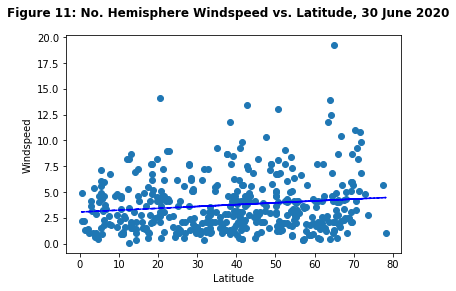

y = 0.02 * x + 3.05
Pearsons correlation coefficient: 0.133


In [24]:
# find the fit line: y = mx + b
x_axis = northern_df['lat']
y_values = northern_df['windspeed']
(slope, intercept, _, _, _) = linregress(x_axis, y_values)
fit = slope * x_axis + intercept

# graph the line and the scatter plot together using subplot()
fig, ax = plt.subplots()

fig.suptitle("Figure 11: No. Hemisphere Windspeed vs. Latitude, 30 June 2020", fontsize=12, fontweight="bold")

# ax.set_xlim(min(capomulin_avg_df["Weight (g)"])-1, max(capomulin_avg_df["Weight (g)"])+1)
# ax.set_ylim(min(capomulin_avg_df["Tumor Volume (mm3)"])-1, max(capomulin_avg_df["Tumor Volume (mm3)"])+1)

ax.set_xlabel("Latitude")
ax.set_ylabel("Windspeed")

ax.plot(x_axis, y_values, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Save as png
plt.savefig('Images/Figure11.png')

plt.show()

print(f'y = {round(slope,2)} * x + {round(intercept,2)}')
corr, _ = pearsonr(x_axis, y_values)
print('Pearsons correlation coefficient: %.3f' % corr)

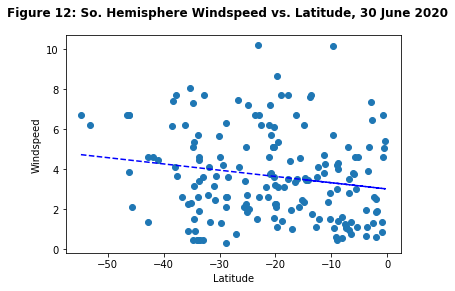

y = -0.03 * x + 3.0
Pearsons correlation coefficient: -0.180


In [25]:
# find the fit line: y = mx + b
x_axis = southern_df['lat']
y_values = southern_df['windspeed']
(slope, intercept, _, _, _) = linregress(x_axis, y_values)
fit = slope * x_axis + intercept

# graph the line and the scatter plot together using subplot()
fig, ax = plt.subplots()

fig.suptitle("Figure 12: So. Hemisphere Windspeed vs. Latitude, 30 June 2020", fontsize=12, fontweight="bold")

# ax.set_xlim(min(capomulin_avg_df["Weight (g)"])-1, max(capomulin_avg_df["Weight (g)"])+1)
# ax.set_ylim(min(capomulin_avg_df["Tumor Volume (mm3)"])-1, max(capomulin_avg_df["Tumor Volume (mm3)"])+1)

ax.set_xlabel("Latitude")
ax.set_ylabel("Windspeed")

ax.plot(x_axis, y_values, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Save as png
plt.savefig('Images/Figure12.png')

plt.show()

print(f'y = {round(slope,2)} * x + {round(intercept,2)}')
corr, _ = pearsonr(x_axis, y_values)
print('Pearsons correlation coefficient: %.3f' % corr)